In [50]:
# Import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read original csv
rym = pd.read_csv("rym.csv")
print(rym.head())

   RYM Album  First Name    Last Name  First Name localized  \
0    3182509         NaN        Adele                   NaN   
1   13005983         The    Alchemist                   NaN   
2    7439765         The   Avalanches                   NaN   
3         63         The   Beach Boys                   NaN   
4    2548617         NaN  Beach House                   NaN   

    Last Name localized               Title  Release_Date  Rating Ownership  \
0                   NaN                  21          2011       9         n   
1                   NaN  This Thing of Ours          2021       7         n   
2                   NaN          Wildflower          2016       8         n   
3                   NaN          Pet Sounds          1966       8         n   
4                   NaN          Teen Dream          2010       7         n   

   Purchase Date  Media Type Review  
0            NaN         NaN     ""  
1            NaN         NaN     ""  
2            NaN         NaN    

In [51]:
# Select relevant columns from csv
rym_key = rym[[" First Name", "Last Name", "Title", "Release_Date", "Rating"]]
rym_key.columns = ["First", "Last", "Title", "Year", "Rating"]

# Merge First and Last names into one string under "Full" column
full_names = []
for ind, row in rym_key.iterrows():
    if str(row["First"]) == "nan":
        full_names.append(str(row["Last"]))
    elif str(row["Last"]) == "nan":
        full_names.append(str(row["First"]))
    else:
        full_names.append(str(row["First"]) + " " + str(row["Last"]))
rym_key = rym_key.assign(Full=full_names)

# Modify rym_key to only include Full Name, Title, Year and Rating
rym_key = rym_key[["Full", "Title", "Year", "Rating"]]
print(rym_key.head())

             Full               Title  Year  Rating
0           Adele                  21  2011       9
1   The Alchemist  This Thing of Ours  2021       7
2  The Avalanches          Wildflower  2016       8
3  The Beach Boys          Pet Sounds  1966       8
4     Beach House          Teen Dream  2010       7


In [52]:
# Update Ampersand symbol in Full and Title columns (appears as &amp; in .csv file)
new_names = []
new_titles = []

for key, row in rym_key.iterrows():
    new_names.append(str(row["Full"]).replace("&amp;", "&"))
    new_titles.append(str(row["Title"]).replace("&amp;", "&"))
rym_key = rym_key.assign(Full = new_names, Title = new_titles)

# Show Examples
print(rym_key[(rym_key["Full"] == "Miguel") | (rym_key["Full"] == "Blu & Oh No")])

            Full                                    Title  Year  Rating
43   Blu & Oh No  A Long Red Hot Los Angeles Summer Night  2019       7
286       Miguel                            War & Leisure  2017       7


In [53]:
# Count values to determine most common artists catalogued.
artists = rym_key["Full"].value_counts()
print("Top 5 Most Catalogued Artists:")
print(artists.head())

Top 5 Most Catalogued Artists:
Death Grips        7
Lil Ugly Mane      6
Earl Sweatshirt    5
Vince Staples      4
Kanye West         4
Name: Full, dtype: int64


    Rating  counts
0        7      89
1        8      84
2        6      46
3        9      40
4        5      22
5       10      19
6        4      14
7        3       6
8        1       2
9        0       1
10       2       1


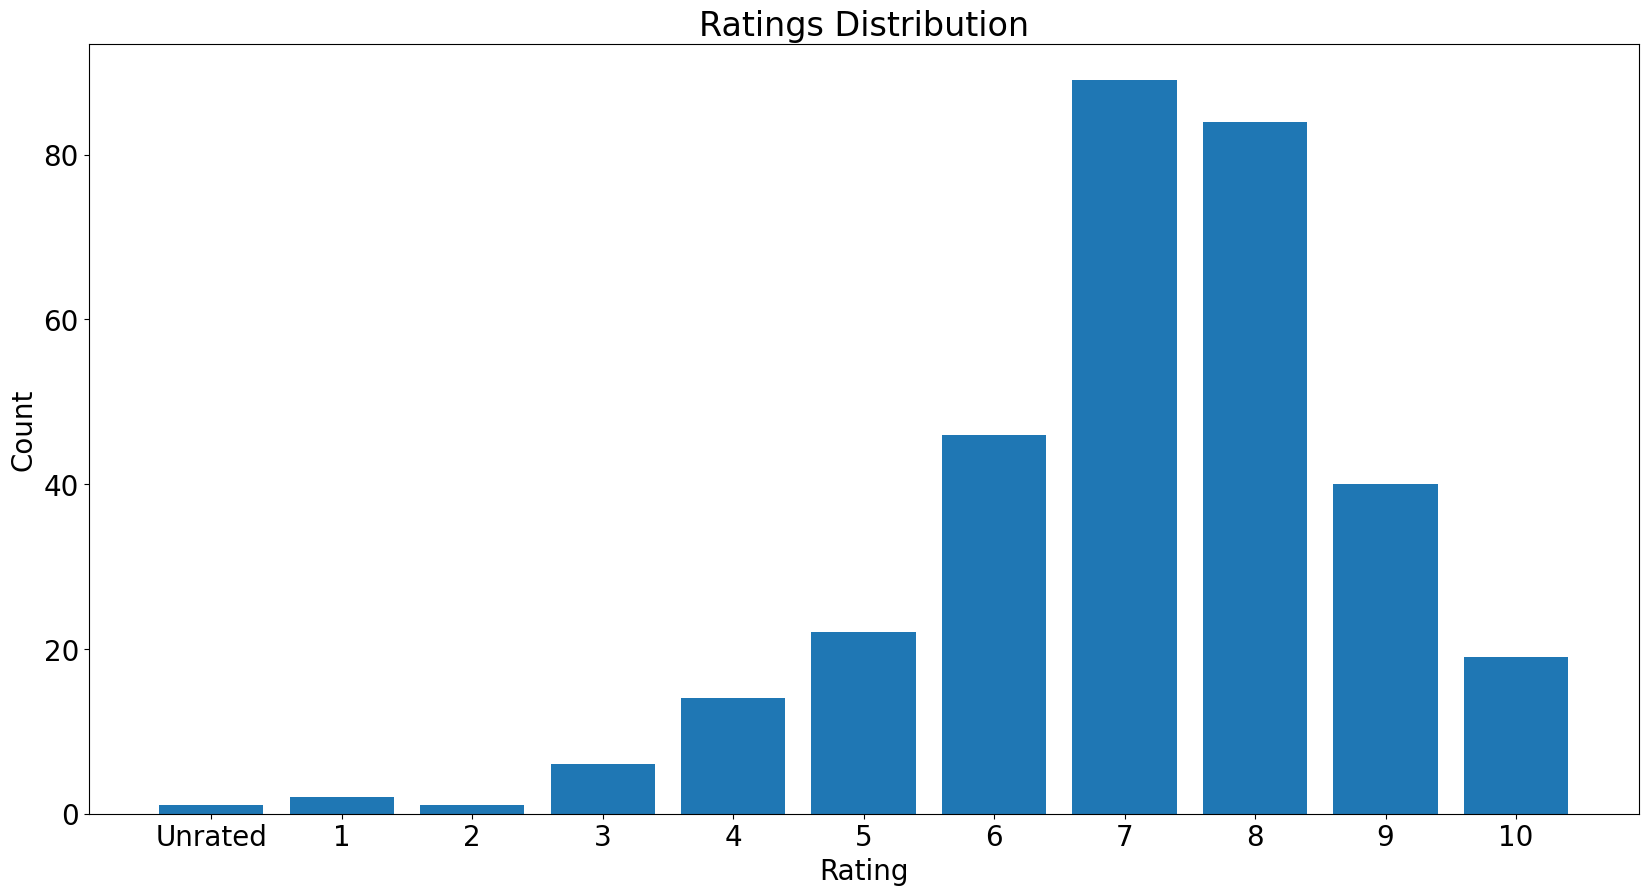

In [54]:
# Count ratings to determine rating distribution (Use a dictionary so all possible ratings can be shown on the bar graph, if you just use a sorted array, some of the ratings might not be included if no albums were given that rating)
ratings =rym_key["Rating"].value_counts().rename_axis('Rating').reset_index(name='counts')
print(ratings)
ratings_dict = { 'Unrated':0, '1':0, '2':0, '3':0, '4':0, '5':0, '6':0, '7':0, '8':0, '9':0, '10':0 }

# Iterate through ratings and update ratings_dict
for ind, row in ratings.iterrows():
    if row['Rating'] == 0:
        ratings_dict['Unrated'] = row['counts']
    else:
        ratings_dict[str(row['Rating'])] = row['counts']

# Visualize Rating Distribution using a Bar Graph
plt.figure(figsize=(20, 10))
plt.rcParams['font.size'] = 20.0
ratings_graph = plt.bar(ratings_dict.keys(), ratings_dict.values())
plt.title("Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

In [55]:
# Stats not including ratings of 0 (which are unrated projects)
print(rym_key[rym_key["Rating"] != 0].describe())

              Year      Rating
count   323.000000  323.000000
mean   2013.925697    7.148607
std       9.933665    1.635084
min    1966.000000    1.000000
25%    2012.000000    6.000000
50%    2018.000000    7.000000
75%    2020.000000    8.000000
max    2022.000000   10.000000


In [56]:
# Group Data by year and calculate average rating by year (Excluding ratings of 0)
rym_key_year = rym_key[rym_key["Rating"] != 0].groupby('Year')['Rating'].agg(np.mean).rename_axis('Year').reset_index(name='Avg_rating')

# Group Data by year and calculate album count by year (Excluding ratings of 0)
rym_album_counts_year = rym_key[rym_key["Rating"] != 0]['Year'].value_counts().reset_index().sort_values('index')

# Group Data by year and calculate album count by year (Excluding ratings of 0)
rym_album_counts_year = rym_key[rym_key["Rating"] != 0]['Year'].value_counts().reset_index().sort_values('index')

# Join rym_key_year and rym_album_counts_year on year
rym_key_year = rym_key_year.merge(rym_album_counts_year, how='inner', left_on = 'Year', right_on = 'index')

# Adjust formatting
rym_key_year = rym_key_year[['Year_x', 'Avg_rating', 'Year_y']]
rym_key_year.columns = ['Year', 'Avg_rating', 'Album_count']

# Show Results
print(rym_key_year)

    Year  Avg_rating  Album_count
0   1966    8.000000            1
1   1969    9.000000            1
2   1973    7.000000            1
3   1975    9.000000            1
4   1976    8.000000            1
5   1978    8.000000            1
6   1980    8.000000            1
7   1982    4.000000            1
8   1986    9.000000            1
9   1989    9.000000            1
10  1990    8.000000            2
11  1991    8.000000            3
12  1993    7.000000            1
13  1994    8.333333            3
14  1995    7.750000            4
15  1996    8.000000            3
16  1997    7.000000            1
17  1998    7.000000            3
18  1999    9.000000            1
19  2000    9.000000            1
20  2001    9.333333            3
21  2002    8.333333            3
22  2003    6.000000            5
23  2004    8.000000            2
24  2005    7.000000            1
25  2006    6.800000            5
26  2007    8.000000            4
27  2008    7.400000            5
28  2009    6.

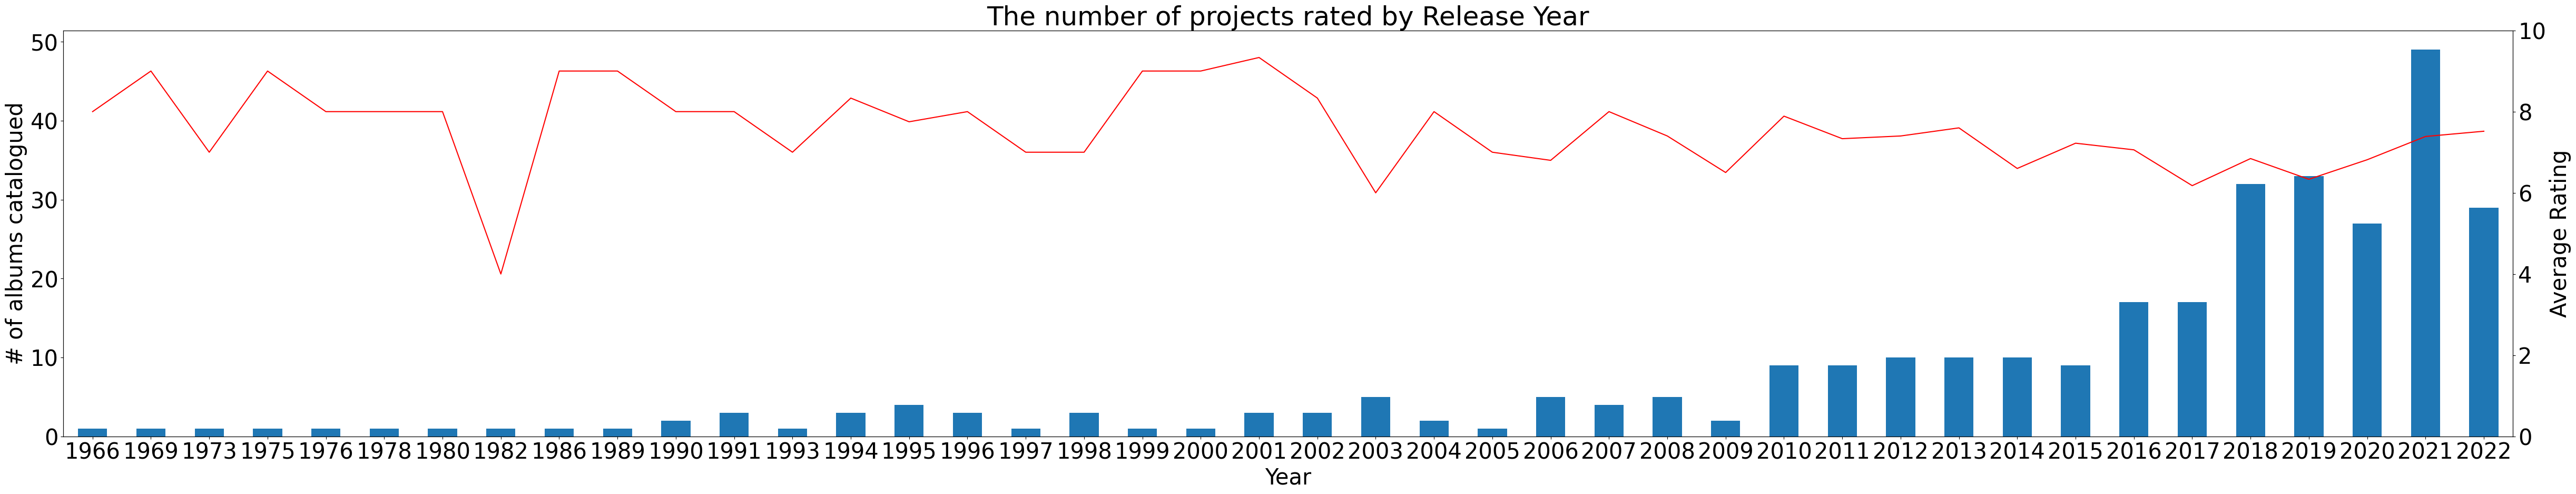

In [57]:
# Visualizing the distribution of albums by year using a Bar Graph:
plt.figure(figsize=(60, 10))
plt.rcParams['font.size'] = 30
plt.title("The number of projects rated by Release Year")
plt.xlabel("Year")
plt.ylabel("# of albums catalogued")
rym_key_year['Album_count'].plot(kind = 'bar')
rym_key_year['Avg_rating'].plot(secondary_y = True, color='red')
ax_y = plt.gca()
ax_y.set_xticklabels(rym_key_year['Year'], size = 9)
ax_y.set_ylim(0,10)
ax_y.set_ylabel("Average Rating")
plt.show()

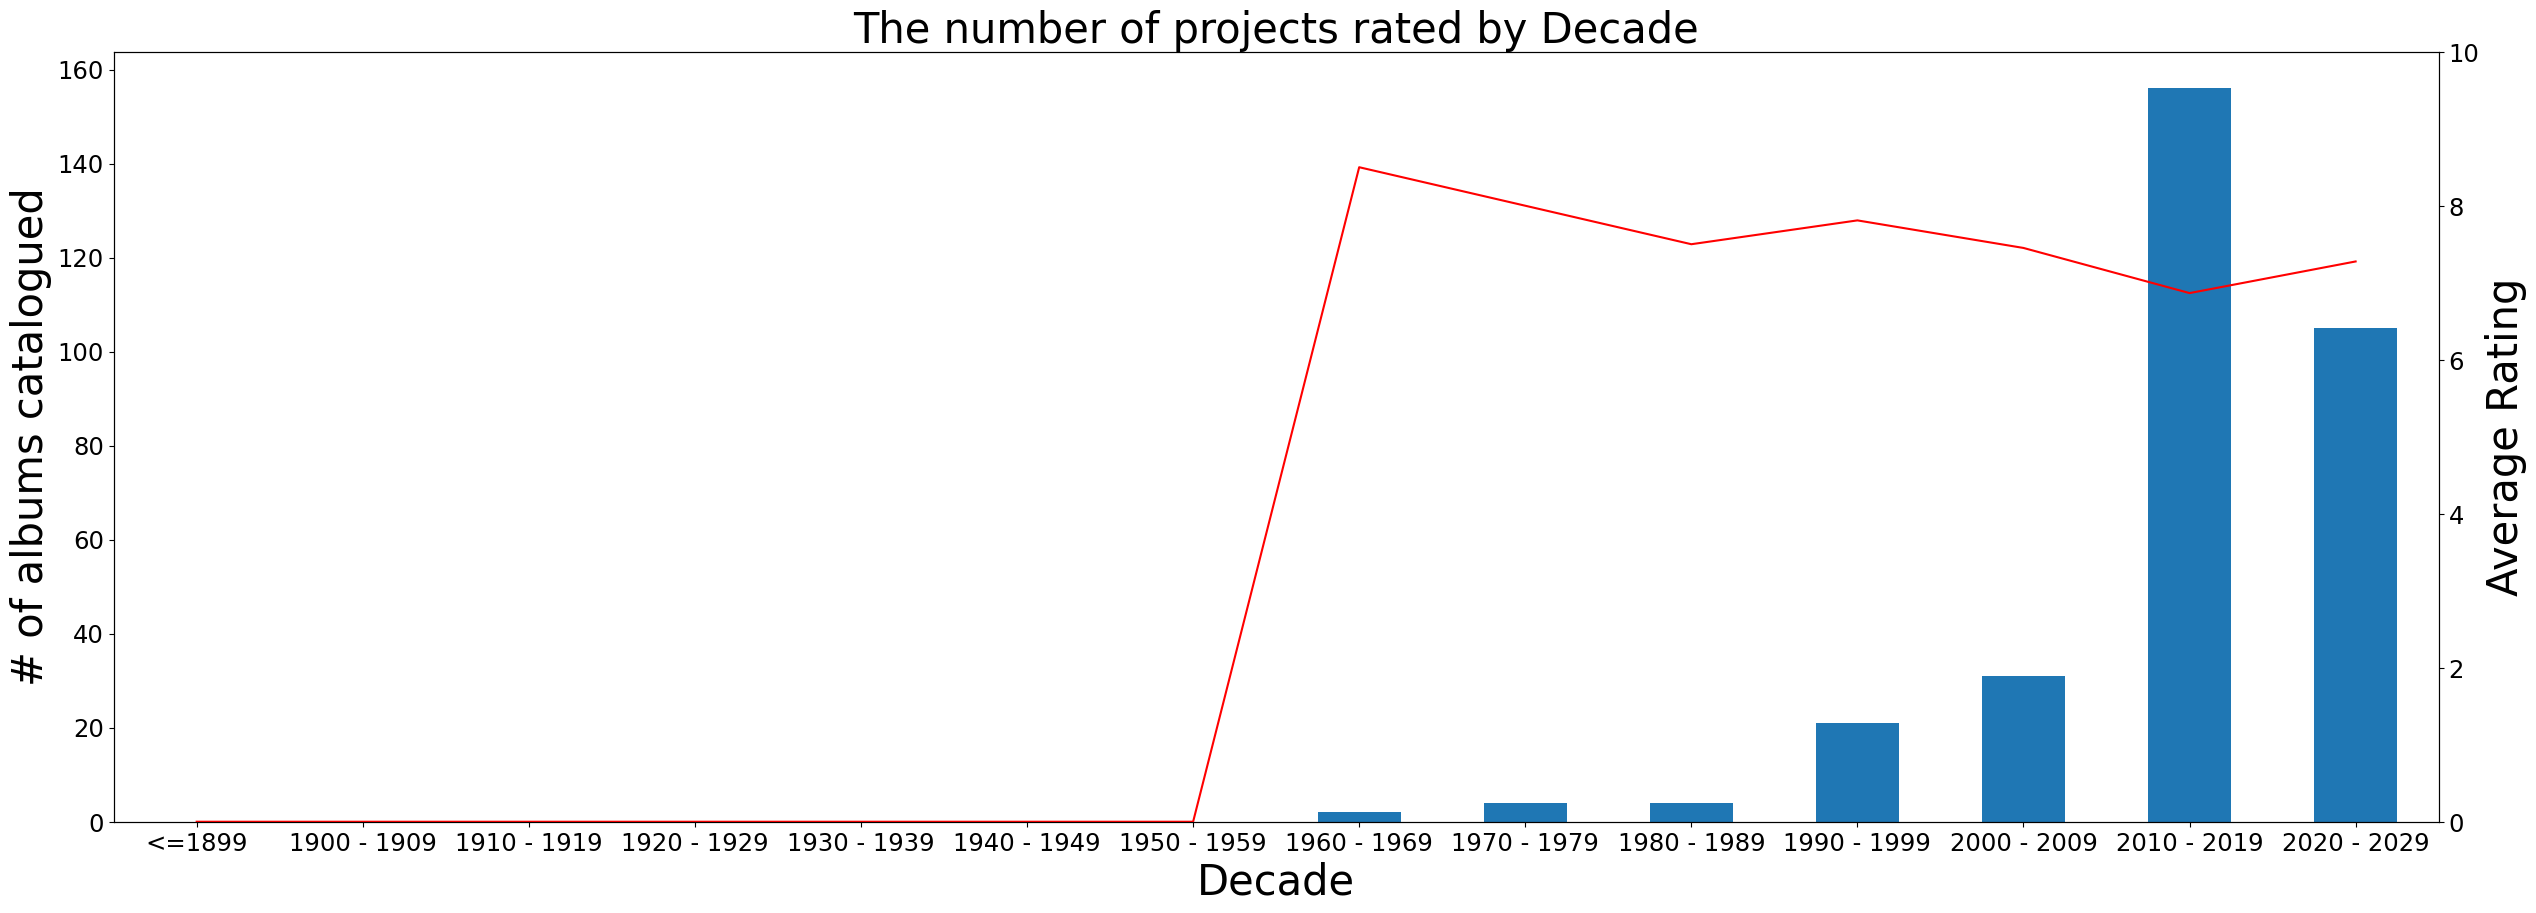

In [60]:
# Sort album counts and average ratings by decade. Use dictionary approach like with ratings. First entry in key = album count, second entry in key = average rating for decade. EXCLUDES RATINGS OF 0
album_counts_decade = {'<=1899': [0, 0],
                      '1900 - 1909': [0,0],
                      '1910 - 1919': [0,0],
                      '1920 - 1929': [0,0],
                      '1930 - 1939': [0,0],
                      '1940 - 1949': [0,0],
                      '1950 - 1959': [0,0],
                      '1960 - 1969': [0,0],
                      '1970 - 1979': [0,0],
                      '1980 - 1989': [0,0],
                      '1990 - 1999': [0,0],
                      '2000 - 2009': [0,0],
                      '2010 - 2019': [0,0],
                      '2020 - 2029': [0,0]}

# Update album_counts_decade by iterating through rym_key_year
for ind, row in rym_key_year.iterrows():
    if (row["Year"] <= 1899):
        album_counts_decade['<=1899'][1] = (album_counts_decade['<=1899'][1] * album_counts_decade['<=1899'][0] + row['Album_count'] * row['Avg_rating'])/(album_counts_decade['<=1899'][0] + row['Album_count'])
        album_counts_decade['<=1899'][0] = album_counts_decade['<=1899'][0] + row['Album_count']
        
    elif (row["Year"] >= 1900) and (row["Year"] <= 1909):
        album_counts_decade['1900 - 1909'][1] = (album_counts_decade['1900 - 1909'][1] * album_counts_decade['1900 - 1909'][0] + row['Album_count'] * row['Avg_rating'])/(album_counts_decade['1900 - 1909'][0] + row['Album_count'])
        album_counts_decade['1900 - 1909'][0] = album_counts_decade['1900 - 1909'][0] + row['Album_count']
        
    elif (row["Year"] >= 1910) and (row["Year"] <= 1919):
        album_counts_decade['1910 - 1919'][1] = (album_counts_decade['1910 - 1919'][1] * album_counts_decade['1910 - 1919'][0] + row['Album_count'] * row['Avg_rating'])/(album_counts_decade['1910 - 1919'][0] + row['Album_count'])
        album_counts_decade['1910 - 1919'][0] = album_counts_decade['1910 - 1919'][0] + row['Album_count']
        
    elif (row["Year"] >= 1920) and (row["Year"] <= 1929):
        album_counts_decade['1920 - 1929'][1] = (album_counts_decade['1920 - 1929'][1] * album_counts_decade['1920 - 1929'][0] + row['Album_count'] * row['Avg_rating'])/(album_counts_decade['1920 - 1929'][0] + row['Album_count'])
        album_counts_decade['1920 - 1929'][0] = album_counts_decade['1920 - 1929'][0] + row['Album_count']
        
    elif (row["Year"] >= 1930) and (row["Year"] <= 1939):
        album_counts_decade['1930 - 1939'][1] = (album_counts_decade['1930 - 1939'][1] * album_counts_decade['1930 - 1939'][0] + row['Album_count'] * row['Avg_rating'])/(album_counts_decade['1930 - 1939'][0] + row['Album_count'])
        album_counts_decade['1930 - 1939'][0] = album_counts_decade['1930 - 1939'][0] + row['Album_count']
        
    elif (row["Year"] >= 1940) and (row["Year"] <= 1949):
        album_counts_decade['1940 - 1949'][1] = (album_counts_decade['1940 - 1949'][1] * album_counts_decade['1940 - 1949'][0] + row['Album_count'] * row['Avg_rating'])/(album_counts_decade['1940 - 1949'][0] + row['Album_count'])
        album_counts_decade['1940 - 1949'][0] = album_counts_decade['1940 - 1949'][0] + row['Album_count']
        
    elif (row["Year"] >= 1950) and (row["Year"] <= 1959):
        album_counts_decade['1950 - 1959'][1] = (album_counts_decade['1950 - 1959'][1] * album_counts_decade['1950 - 1959'][0] + row['Album_count'] * row['Avg_rating'])/(album_counts_decade['1950 - 1959'][0] + row['Album_count'])
        album_counts_decade['1950 - 1959'][0] = album_counts_decade['1950 - 1959'][0] + row['Album_count']
    
    elif (row["Year"] >= 1960) and (row["Year"] <= 1969):
        album_counts_decade['1960 - 1969'][1] = (album_counts_decade['1960 - 1969'][1] * album_counts_decade['1960 - 1969'][0] + row['Album_count'] * row['Avg_rating'])/(album_counts_decade['1960 - 1969'][0] + row['Album_count'])
        album_counts_decade['1960 - 1969'][0] = album_counts_decade['1960 - 1969'][0] + row['Album_count']
    
    elif (row["Year"] >= 1970) and (row["Year"] <= 1979):
        album_counts_decade['1970 - 1979'][1] = (album_counts_decade['1970 - 1979'][1] * album_counts_decade['1970 - 1979'][0] + row['Album_count'] * row['Avg_rating'])/(album_counts_decade['1970 - 1979'][0] + row['Album_count'])
        album_counts_decade['1970 - 1979'][0] = album_counts_decade['1970 - 1979'][0] + row['Album_count']
    
    elif (row["Year"] >= 1980) and (row["Year"] <= 1989):
        album_counts_decade['1980 - 1989'][1] = (album_counts_decade['1980 - 1989'][1] * album_counts_decade['1980 - 1989'][0] + row['Album_count'] * row['Avg_rating'])/(album_counts_decade['1980 - 1989'][0] + row['Album_count'])
        album_counts_decade['1980 - 1989'][0] = album_counts_decade['1980 - 1989'][0] + row['Album_count']
        
    elif (row["Year"] >= 1990) and (row["Year"] <= 1999):
        album_counts_decade['1990 - 1999'][1] = (album_counts_decade['1990 - 1999'][1] * album_counts_decade['1990 - 1999'][0] + row['Album_count'] * row['Avg_rating'])/(album_counts_decade['1990 - 1999'][0] + row['Album_count'])
        album_counts_decade['1990 - 1999'][0] = album_counts_decade['1990 - 1999'][0] + row['Album_count']
    
    elif (row["Year"] >= 2000) and (row["Year"] <= 2009):
        album_counts_decade['2000 - 2009'][1] = (album_counts_decade['2000 - 2009'][1] * album_counts_decade['2000 - 2009'][0] + row['Album_count'] * row['Avg_rating'])/(album_counts_decade['2000 - 2009'][0] + row['Album_count'])
        album_counts_decade['2000 - 2009'][0] = album_counts_decade['2000 - 2009'][0] + row['Album_count']
        
    elif (row["Year"] >= 2010) and (row["Year"] <= 2019):
        album_counts_decade['2010 - 2019'][1] = (album_counts_decade['2010 - 2019'][1] * album_counts_decade['2010 - 2019'][0] + row['Album_count'] * row['Avg_rating'])/(album_counts_decade['2010 - 2019'][0] + row['Album_count'])
        album_counts_decade['2010 - 2019'][0] = album_counts_decade['2010 - 2019'][0] + row['Album_count']
        
    elif (row["Year"] >= 2020) and (row["Year"] <= 2029):
        album_counts_decade['2020 - 2029'][1] = (album_counts_decade['2020 - 2029'][1] * album_counts_decade['2020 - 2029'][0] + row['Album_count'] * row['Avg_rating'])/(album_counts_decade['2020 - 2029'][0] + row['Album_count'])
        album_counts_decade['2020 - 2029'][0] = album_counts_decade['2020 - 2029'][0] + row['Album_count']

# Create new DataFrame rym_decades with years, ratings per decade and average rating per decade
decade_album_counts = [] # list of album counts per decade
decade_averages = [] # list of album averages per decade

for val in album_counts_decade.values():
    decade_album_counts.append(val[0])
    decade_averages.append(val[1])

rym_decades = {'Year': album_counts_decade.keys(),
              'Album_count': decade_album_counts,
              'Average': decade_averages}

rym_decades = pd.DataFrame(rym_decades)

# Display decade data as a bar graph
plt.figure(figsize=(30, 10))
plt.rcParams['font.size'] = 17.5
plt.title("The number of projects rated by Decade",size=30)
plt.xlabel("Decade", size=30)
plt.ylabel("# of albums catalogued", size=30)
rym_decades['Album_count'].plot(kind = 'bar')
rym_decades['Average'].plot(secondary_y = True, color='red')
ax = plt.gca()
ax.set_xticklabels(rym_decades['Year'])
ax.set_ylim(0,10)
ax.set_ylabel("Average Rating", size = 30)
plt.show()